In [1]:
!pip install prophet --quiet

In [2]:
!pip install --upgrade pandas-datareader --quiet

In [3]:
!pip install --upgrade pandas --quiet

#Predicting stock prices with Facebook's prediction tool: fbprophet

In [4]:
import pandas_datareader as reader
import datetime as dt
import matplotlib.pyplot as plt
import tqdm as notebook_tqdm

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

## Amazon Price Forecast (AMZN)

In [5]:
# Get twenty years of history
end_date = dt.datetime.now()
start_date = dt.datetime(end_date.year - 20, end_date.month, end_date.day)

In [6]:
print("Start Date:",start_date)
print("End Date:",end_date)

Start Date: 2002-08-01 00:00:00
End Date: 2022-08-01 13:22:17.153260


In [7]:
!pip install --upgrade pandas-datareader --quiet

In [8]:
df = reader.get_data_yahoo('AMZN', start_date, end_date)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-08-01,0.7250,0.6995,0.7155,0.7080,121336000.0,0.7080
2002-08-02,0.7070,0.6725,0.7065,0.6920,83572000.0,0.6920
2002-08-05,0.6895,0.6390,0.6825,0.6435,77146000.0,0.6435
2002-08-06,0.6950,0.6570,0.6635,0.6870,94038000.0,0.6870
2002-08-07,0.6970,0.6425,0.6965,0.6800,111114000.0,0.6800


In [13]:
from prophet import Prophet

In [17]:
# Create a new Prophet model
model = Prophet()

In [18]:
model

In [19]:
# Need to reset index so that it's a column
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-08-01,0.7250,0.6995,0.7155,0.7080,121336000.0,0.7080
1,2002-08-02,0.7070,0.6725,0.7065,0.6920,83572000.0,0.6920
2,2002-08-05,0.6895,0.6390,0.6825,0.6435,77146000.0,0.6435
3,2002-08-06,0.6950,0.6570,0.6635,0.6870,94038000.0,0.6870
4,2002-08-07,0.6970,0.6425,0.6965,0.6800,111114000.0,0.6800


In [20]:
# Prophet expects two new columns: 'ds' and 'y'
# Set them equal to 'Date' and 'Adj Close'

df[['ds', 'y']] = df[['Date', 'Adj Close']]
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,ds,y
0,2002-08-01,0.7250,0.6995,0.7155,0.7080,121336000.0,0.7080,2002-08-01,0.7080
1,2002-08-02,0.7070,0.6725,0.7065,0.6920,83572000.0,0.6920,2002-08-02,0.6920
2,2002-08-05,0.6895,0.6390,0.6825,0.6435,77146000.0,0.6435,2002-08-05,0.6435
3,2002-08-06,0.6950,0.6570,0.6635,0.6870,94038000.0,0.6870,2002-08-06,0.6870
4,2002-08-07,0.6970,0.6425,0.6965,0.6800,111114000.0,0.6800,2002-08-07,0.6800


In [21]:
# Fit the Prophet model to the dataframe
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqqfxwba2/ze1sxzqf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqqfxwba2/vzejc_3j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80520', 'data', 'file=/tmp/tmpqqfxwba2/ze1sxzqf.json', 'init=/tmp/tmpqqfxwba2/vzejc_3j.json', 'output', 'file=/tmp/tmplrnpeyke/prophet_model-20220801132648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:26:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:26:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
# Define the future time horizon
# In this case lets look at GOOG price in one year
future = model.make_future_dataframe(periods=365)

In [23]:
forecast = model.predict(future)

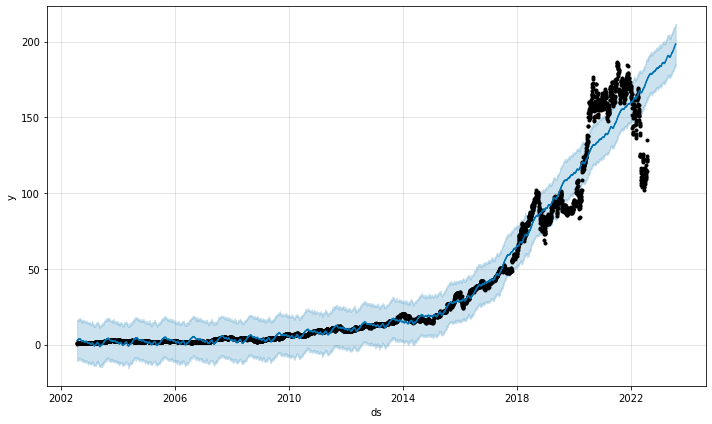

In [24]:
model.plot(forecast)
plt.show()

## Tesla Price Forecast (TSLA)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqqfxwba2/3mwwo2w8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqqfxwba2/030sroer.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87633', 'data', 'file=/tmp/tmpqqfxwba2/3mwwo2w8.json', 'init=/tmp/tmpqqfxwba2/030sroer.json', 'output', 'file=/tmp/tmpb7nwvz8v/prophet_model-20220801132900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:29:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:29:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


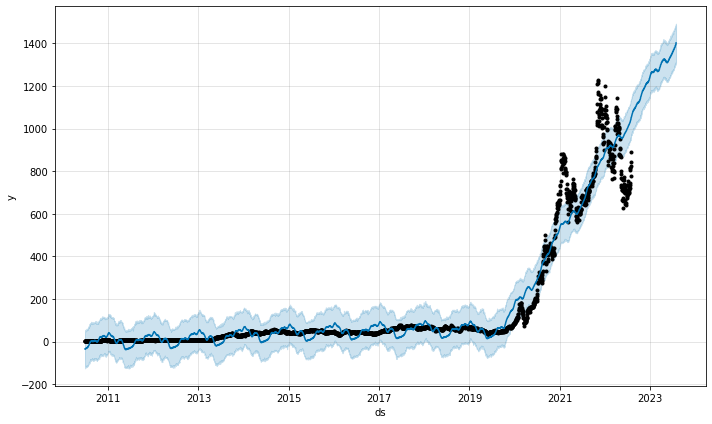

In [25]:
# Rolling all of the above into a single function
def price_forecast_model(ticker, end=dt.datetime.now(), days=365):
    # Specify start and end dates and load in dataframe
    start = dt.datetime(end.year - 20, end.month, end.day)
    df = reader.get_data_yahoo(ticker, start, end)
    
    # Instantiate Prophet Model
    model = Prophet()

    # Reset index - required for Prophet
    df = df.reset_index()
    # Setup two new parameters required for Prophet
    df[['ds', 'y']] = df[['Date', 'Adj Close']]

    # Fit the Prophet Model to the DataFrame
    model.fit(df)
    future = model.make_future_dataframe(periods=days)
    forecast = model.predict(future)
    model.plot(forecast)

price_forecast_model('TSLA')